In [346]:
import pandas as pd
import numpy as np

In [347]:
# Load data
data = pd.read_csv("adult.csv")

In [348]:
print (data)
for col in data.columns:
    print(col)

       age workclass  fnlwgt     education  education.num      marital.status  \
0       90         ?   77053       HS-grad              9             Widowed   
1       82   Private  132870       HS-grad              9             Widowed   
2       66         ?  186061  Some-college             10             Widowed   
3       54   Private  140359       7th-8th              4            Divorced   
4       41   Private  264663  Some-college             10           Separated   
...    ...       ...     ...           ...            ...                 ...   
32556   22   Private  310152  Some-college             10       Never-married   
32557   27   Private  257302    Assoc-acdm             12  Married-civ-spouse   
32558   40   Private  154374       HS-grad              9  Married-civ-spouse   
32559   58   Private  151910       HS-grad              9             Widowed   
32560   22   Private  201490       HS-grad              9       Never-married   

              occupation   

In [349]:
# Remove missing values
data = data.replace('?', np.nan)
data

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,NaN,77053,HS-grad,9,Widowed,NaN,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,NaN,186061,Some-college,10,Widowed,NaN,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


In [350]:
data.isna().sum()


age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     583
income               0
dtype: int64

In [351]:
data = data.dropna()

In [352]:
data

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


In [353]:
data.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [354]:
# IQR for Outliers Handlers 
def outliers(data, column):
    q1 = data[column].quantile(0.25)
    q3 = data[column].quantile(0.75)
    iqr = q3 - q1
    low_bound = q1 - 1.5 * iqr
    up_bound = q3 - 1.5 * iqr
    data = data[~((data[column] < low_bound) | (data[column] > up_bound))]
    return data



In [355]:
# Label encode categorical columns

from sklearn.preprocessing import LabelEncoder

cat_cols = ["workclass", "education", "marital.status", "occupation", "race", "sex"]
le = LabelEncoder()
for col in cat_cols:
    data[col] = le.fit_transform(data[col])
    
    
y = le.fit_transform(data['income'])
y = pd.Series(y)
y = y.dropna()




C:\Users\Faisal\AppData\Local\Temp\ipykernel_27540\2577584964.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col] = le.fit_transform(data[col])
C:\Users\Faisal\AppData\Local\Temp\ipykernel_27540\2577584964.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col] = le.fit_transform(data[col])
C:\Users\Faisal\AppData\Local\Temp\ipykernel_27540\2577584964.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = va

In [356]:
# Perform feature selection on the categorical columns

from sklearn.feature_selection import SelectKBest, chi2

X = data[cat_cols]
selector = SelectKBest(chi2, k=5)
selector.fit(X, y)
X_new = selector.transform(X)
selected_features = X.columns[selector.get_support(indices=True)]



In [357]:
# Apply outlier handling
num_cols = ["age", "education.num", "capital.gain", "capital.loss", "hours.per.week"]
for col in num_cols:
    data = outliers(data, col)


In [358]:
# Combine the selected features with the numerical columns

X_numerical = data[num_cols]
X_selected = pd.concat([X_numerical, X[selected_features]], axis=1)


In [359]:
# Split the data into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.1, random_state=42)

In [360]:
# Standardize the numerical features

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.select_dtypes(include=[np.number]))
X_test_scaled = scaler.transform(X_test.select_dtypes(include=[np.number]))

In [361]:
# XGBoost Model Training and Evaluation

import xgboost as xgb
from sklearn.metrics import mean_squared_error

xgb_model = xgb.XGBRegressor(
    learning_rate=0.1,
    max_depth=3,
    n_estimators=100,
    objective='reg:squarederror',
    random_state=42
)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)
xgb_rmse = np.sqrt(mean_squared_error(y_test, y_pred_xgb))

print(f"XGBoost RMSE: {xgb_rmse:.2f}")

XGBoost RMSE: 0.43


In [362]:
# LightGBM Model Training and Evaluation

import lightgbm as lgb

lgb_model = lgb.LGBMRegressor(
    learning_rate=0.1,
    max_depth=3,
    n_estimators=100,
    objective='regression',
    random_state=42

)
lgb_model.fit(X_train, y_train)
y_pred_lgb = lgb_model.predict(X_test)
lgb_rmse = np.sqrt(mean_squared_error(y_test, y_pred_lgb))

print(f"LightGBM RMSE: {lgb_rmse:.2f}")

LightGBM RMSE: 0.43


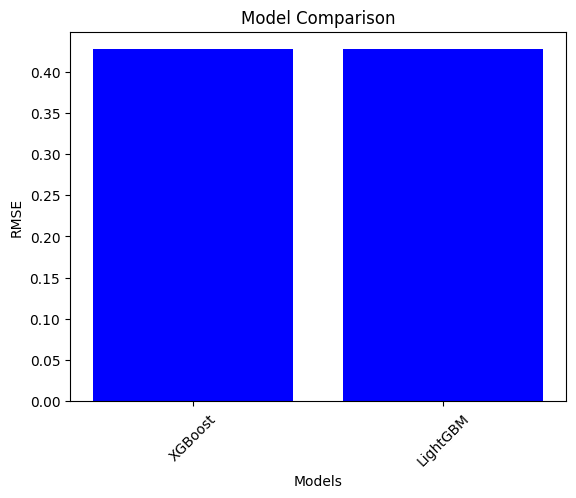

In [363]:
# Models Comparison

import matplotlib.pyplot as plt

models = ['XGBoost', 'LightGBM']
rmse_values = [xgb_rmse, lgb_rmse]

plt.bar(models, rmse_values, color='b')
plt.title('Model Comparison')
plt.xlabel('Models')
plt.ylabel('RMSE')
plt.xticks(rotation=45)
plt.show()

In [364]:
# Build the GUI

import tkinter as tk

root = tk.Tk()
root.title('Average Income Prediction')
root.geometry('400x300')

''

In [365]:
# Create labels and entry boxes for input features
age_label = tk.Label(root, text='Age:')
age_label.grid(row=0, column=0, padx=10, pady=10)
age_entry = tk.Entry(root)
age_entry.grid(row=0, column=1)

education_num_label = tk.Label(root, text='Education Num:')
education_num_label.grid(row=1, column=0, padx=10, pady=10)
education_num_entry = tk.Entry(root)
education_num_entry.grid(row=1, column=1)

capital_gain_label = tk.Label(root, text='Capital Gain:')
capital_gain_label.grid(row=2, column=0, padx=10, pady=10)
capital_gain_entry = tk.Entry(root)
capital_gain_entry.grid(row=2, column=1)

capital_loss_label = tk.Label(root, text='Capital Loss:')
capital_loss_label.grid(row=3, column=0, padx=10, pady=10)
capital_loss_entry = tk.Entry(root)
capital_loss_entry.grid(row=3, column=1)

hours_per_week_label = tk.Label(root, text='Hours per Week:')
hours_per_week_label.grid(row=4, column=0, padx=10, pady=10)
hours_per_week_entry = tk.Entry(root)
hours_per_week_entry.grid(row=4, column=1)

In [366]:
# Create a function to predict the average income
def predict_income():
    age = float(age_entry.get())
    education_num = float(education_num_entry.get())
    capital_gain = float(capital_gain_entry.get())
    capital_loss = float(capital_loss_entry.get())
    hours_per_week = float(hours_per_week_entry.get())
    data = {'age': age, 'education_num': education_num, 'capital_gain': capital_gain, 'capital_loss': capital_loss, 'hours_per_week': hours_per_week}
    df = pd.DataFrame(data, index=[0])
    df = pd.get_dummies(df, columns=['education', 'marital_status', 'occupation', 'relationship', 'race', 'sex'])
    df = scaler.transform(df)
    income_xgb = xgb_model.predict(df)
    income_lgb = lgb_model.predict(df)
    income_avg = (income_xgb + income_lgb) / 2
    result_label.config(text='Predicted Income: $' + str(round(income_avg[0], 2)))

In [367]:
# Create a button to predict the average income
predict_button = tk.Button(root, text='Predict', command=predict_income)
predict_button.grid(row=5, column=0, columnspan=2, padx=10, pady=10)

In [368]:
# Create a label to display the predicted income
result_label = tk.Label(root, text='')
result_label.grid(row=6, column=0, columnspan=2, padx=10, pady=10)

In [369]:
root.mainloop()

Exception in Tkinter callback
Traceback (most recent call last):
  File "c:\Program Files\Python311\Lib\tkinter\__init__.py", line 1948, in __call__
    return self.func(*args)
           ^^^^^^^^^^^^^^^^
  File "C:\Users\Faisal\AppData\Local\Temp\ipykernel_27540\3253190731.py", line 10, in predict_income
    df = pd.get_dummies(df, columns=['education', 'marital_status', 'occupation', 'relationship', 'race', 'sex'])
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Program Files\Python311\Lib\site-packages\pandas\core\reshape\encoding.py", line 146, in get_dummies
    data_to_encode = data[columns]
                     ~~~~^^^^^^^^^
  File "c:\Program Files\Python311\Lib\site-packages\pandas\core\frame.py", line 3813, in __getitem__
    indexer = self.columns._get_indexer_strict(key, "columns")[1]
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Program Files\Python311\Lib\site-packages